# 12/05 - Pair Programming Limpieza 8 - Guadalupe & Lara

En el ejercicio de pair programming normalizamos la columna de age y nos creamos una nueva columna. En este ejercicio deberéis:


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

from scipy import stats 

pd.options.display.max_columns = None 
df = pd.read_csv("7.ataques_enproceso7.csv", index_col = 0)

**1. Estandarizar la columna de age usando todos los métodos aprendidos en la lección.**

a) MANUAL

In [3]:
media = df["age2"].mean()
print(media)
desvi = df["age2"].std()
print(desvi)

26.473740892710175
9.253627120566952


In [4]:
df["age_estandar_manual"] = (df["age2"] - media) / desvi
df.head()

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date,age2,age2_fillna,age_mean,sex_moda,type_moda,age2_manual,age2_log,age2_rc,age2_bc,age2_remastered,age2mean_remastered,age_estandar_manual
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,white_shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,57.000000,NaN,57.000000,F,Boating,5.004305e-01,4.043051,7.549834,11.824365,0.918033,0.918033,3.298843e+00
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,unspecified,N,Minor injury to left thigh,18-Jun-2018,11.000000,NaN,11.000000,F,Unprovoked,-2.536679e-01,2.397895,3.316625,4.384016,0.163934,0.163934,-1.672181e+00
2,2018.06.09,2018.0,Invalid,usa,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,unspecified,N,Injury to left lower leg from surfboard skeg,09-Jun-2018,48.000000,NaN,48.000000,M,Invalid,3.528895e-01,3.871201,6.928203,10.758199,0.770492,0.770492,2.326251e+00
3,2018.06.08,2018.0,Unprovoked,australia,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,unspecified,N,Minor injury to lower leg,08-Jun-2018,26.473742,NaN,26.473742,M,Unprovoked,1.801862e-08,3.276153,5.145264,7.655961,0.417602,0.417602,1.187789e-07
4,2018.06.04,2018.0,Provoked,mexico,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,tiger_shark,N,Lacerations to leg & hand shark PROVOKED INCIDENT,04-Jun-2018,26.473742,NaN,26.473742,M,Provoked,1.801862e-08,3.276153,5.145264,7.655961,0.417602,0.417602,1.187789e-07


b) Sklearn StandardScaler

In [5]:
df["age2_stdScaled"] = StandardScaler().fit_transform(df[["age2"]])
df.head()

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date,age2,age2_fillna,age_mean,sex_moda,type_moda,age2_manual,age2_log,age2_rc,age2_bc,age2_remastered,age2mean_remastered,age_estandar_manual,age2_stdScaled
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,white_shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,57.000000,NaN,57.000000,F,Boating,5.004305e-01,4.043051,7.549834,11.824365,0.918033,0.918033,3.298843e+00,3.299105e+00
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,unspecified,N,Minor injury to left thigh,18-Jun-2018,11.000000,NaN,11.000000,F,Unprovoked,-2.536679e-01,2.397895,3.316625,4.384016,0.163934,0.163934,-1.672181e+00,-1.672314e+00
2,2018.06.09,2018.0,Invalid,usa,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,unspecified,N,Injury to left lower leg from surfboard skeg,09-Jun-2018,48.000000,NaN,48.000000,M,Invalid,3.528895e-01,3.871201,6.928203,10.758199,0.770492,0.770492,2.326251e+00,2.326436e+00
3,2018.06.08,2018.0,Unprovoked,australia,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,unspecified,N,Minor injury to lower leg,08-Jun-2018,26.473742,NaN,26.473742,M,Unprovoked,1.801862e-08,3.276153,5.145264,7.655961,0.417602,0.417602,1.187789e-07,1.187886e-07
4,2018.06.04,2018.0,Provoked,mexico,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,tiger_shark,N,Lacerations to leg & hand shark PROVOKED INCIDENT,04-Jun-2018,26.473742,NaN,26.473742,M,Provoked,1.801862e-08,3.276153,5.145264,7.655961,0.417602,0.417602,1.187789e-07,1.187886e-07


c) RobustScaler

In [6]:
df["age2_robustScaler"] = RobustScaler().fit_transform(df[["age2"]])
df.head()

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date,age2,age2_fillna,age_mean,sex_moda,type_moda,age2_manual,age2_log,age2_rc,age2_bc,age2_remastered,age2mean_remastered,age_estandar_manual,age2_stdScaled,age2_robustScaler
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,white_shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,57.000000,NaN,57.000000,F,Boating,5.004305e-01,4.043051,7.549834,11.824365,0.918033,0.918033,3.298843e+00,3.299105e+00,6.823428
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,unspecified,N,Minor injury to left thigh,18-Jun-2018,11.000000,NaN,11.000000,F,Unprovoked,-2.536679e-01,2.397895,3.316625,4.384016,0.163934,0.163934,-1.672181e+00,-1.672314e+00,-3.458792
2,2018.06.09,2018.0,Invalid,usa,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,unspecified,N,Injury to left lower leg from surfboard skeg,09-Jun-2018,48.000000,NaN,48.000000,M,Invalid,3.528895e-01,3.871201,6.928203,10.758199,0.770492,0.770492,2.326251e+00,2.326436e+00,4.811690
3,2018.06.08,2018.0,Unprovoked,australia,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,unspecified,N,Minor injury to lower leg,08-Jun-2018,26.473742,NaN,26.473742,M,Unprovoked,1.801862e-08,3.276153,5.145264,7.655961,0.417602,0.417602,1.187789e-07,1.187886e-07,0.000000
4,2018.06.04,2018.0,Provoked,mexico,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,tiger_shark,N,Lacerations to leg & hand shark PROVOKED INCIDENT,04-Jun-2018,26.473742,NaN,26.473742,M,Provoked,1.801862e-08,3.276153,5.145264,7.655961,0.417602,0.417602,1.187789e-07,1.187886e-07,0.000000


**2.¿Véis alguna diferencia entre cada uno de los métodos?**


Hacer desv y media de cada nueva columna

In [7]:
media_standar = df["age2_stdScaled"].mean()
print(media_standar)
desvi_standar = df["age2_stdScaled"].std()
print(desvi_standar)

1.4249918736183665e-15
1.000079526025015


In [8]:
media_robust = df["age2_robustScaler"].mean()
print(media_robust)
desvi_robust = df["age2_robustScaler"].std()
print(desvi_robust)

-2.456865851914469e-07
2.0684311114571208


👩🏽‍🦰👩🏽‍🦱💬   
EVIDENTEMENTE, AMIJO

Con el método StandarScaller la media es igual a 0 y la desviación tiende a 1 y -1, mientras que el robustScaler el rango es variable, ya que utiliza en su fórmula los cuartiles Q1 y Q3 (Q3-Q1). Los resultados de ambos métodos son muy diferentes, normalmente los resultantes del método RobustedScaler serán más altos.

**3. Cread una gráfica con varios subplots donde en cada uno de ellos se vea el resultado de la estandarización y la normalización realizada en los dos ejercicios de pair programming de hoy**

In [9]:
columnas_pair = df[["age2" ,'age2_manual','age2_log', 'age2_rc', 'age2_bc',
       'age2_remastered', 'age_estandar_manual',
       'age2_stdScaled', 'age2_robustScaler']]

columnas_pair.head(10)

,age2,age2_manual,age2_log,age2_rc,age2_bc,age2_remastered,age_estandar_manual,age2_stdScaled,age2_robustScaler
0,57.000000,5.004305e-01,4.043051,7.549834,11.824365,0.918033,3.298843e+00,3.299105e+00,6.823428
1,11.000000,-2.536679e-01,2.397895,3.316625,4.384016,0.163934,-1.672181e+00,-1.672314e+00,-3.458792
2,48.000000,3.528895e-01,3.871201,6.928203,10.758199,0.770492,2.326251e+00,2.326436e+00,4.811690
3,26.473742,1.801862e-08,3.276153,5.145264,7.655961,0.417602,1.187789e-07,1.187886e-07,0.000000
4,26.473742,1.801862e-08,3.276153,5.145264,7.655961,0.417602,1.187789e-07,1.187886e-07,0.000000
5,26.473742,1.801862e-08,3.276153,5.145264,7.655961,0.417602,1.187789e-07,1.187886e-07,0.000000
6,18.000000,-1.389138e-01,2.890372,4.242641,6.054739,0.278689,-9.157210e-01,-9.157938e-01,-1.894106
7,52.000000,4.184633e-01,3.951244,7.211103,11.244285,0.836066,2.758514e+00,2.758733e+00,5.705796
8,15.000000,-1.880941e-01,2.708050,3.872983,5.391589,0.229508,-1.239918e+00,-1.240017e+00,-2.564686
9,12.000000,-2.372744e-01,2.484907,3.464102,4.652295,0.180328,-1.564115e+00,-1.564240e+00,-3.235265


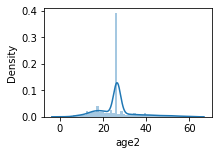

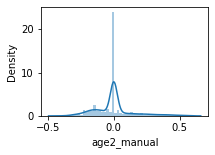

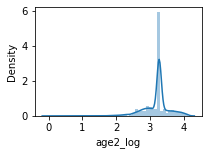

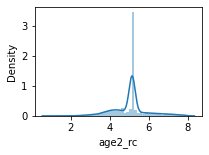

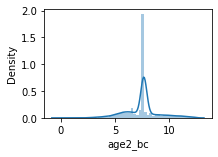

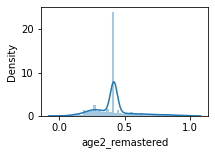

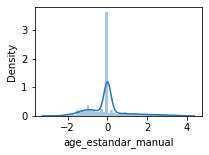

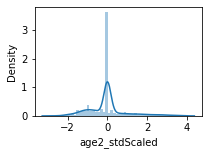

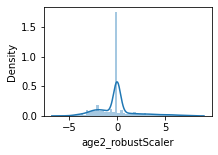

In [10]:
for col in columnas_pair:
    plt.figure(figsize = (3, 2))
    sns.distplot(df[col])
    plt.show()

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (15,5))
for col in columnas_pair:
    
    sns.distplot(df[columnas_pair], ax = axes[0])



    plt.show()
#No nos da tiempo a terminarlo con los subsplot